# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 10px 50px;overflow:hidden;font-weight:800">Fraud Detection on Ethereum Transactions</p>

<img src='https://www.coindesk.com/resizer/qt_up7s1YpvWkrCYBgrBtoW5yKs=/1056x792/filters:quality(80):format(webp)/cloudfront-us-east-1.images.arcpublishing.com/coindesk/72PSYBTMM5D2VD3WI745EU6NII' style='height: 500px; width: 1000px'>

# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:125%;text-align:center;border-radius: 10px 50px;overflow:hidden;font-weight:400">Importing Needed Packages</p>

In [1]:
# For data manipulating
import numpy as np
import pandas as pd

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For Handling Imbalanced Dataset
import imblearn as imb

# For Create Beautiful Reports
from colorama import Fore

# Machine loarning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# For save our model
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import catboost as ctb
import warnings
warnings.filterwarnings('ignore')

# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 10px 50px;overflow:hidden;font-weight:300">First Reading our data and EDA</p>

In [2]:
path = '/kaggle/input/ethereum-frauddetection-dataset/transaction_dataset.csv'
df = pd.read_csv(path)
df.sample(5)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
5703,5703,2771,0x97ff80d13ea3cf30ea9e5c0db210c2f61ddde7c6,0,35.27,0.37,71.27,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4078,4078,1146,0x6ca917377b16dfca1f0ec0aad2d9c84758a1d5dd,0,0.00,1450.10,200114.00,0,138,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,OmiseGO
9527,9527,1866,0xdb82af76f9ccddfe9e8f7996492f4c5bd5f9d53d,1,2213.77,147.20,5163.55,2,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6022,6022,3090,0xa11b88d2e6d7929f7b8885a0db0be614504ea109,0,11.25,636.88,1318.77,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7960,7960,299,0x1efd1b1ee8174b5421786ef0127ea45076307d8d,1,0.00,237.04,19235.95,1,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,GSENetwork


In [3]:
df = df.iloc[:, 3:]
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def explore_data(data):
    print(f'Data Frame Size: {data.size}\n\n')
    print(f'Data Frame Shape: {data.shape}\n\n')
    print(f'Data Frame Columns: {data.columns}\n\n')
    print(f'Data Frame Data Types:\n{data.dtypes}\n\n')
    print(f'Data Frame Head: \n{data.head(5)}\n\n')
    print(f'Data Frame tail: \n{data.tail(5)}\n\n')
    print(f'Data Frame Information:\n{data.info()}\n\n')
    print(f'Data Frame Null Values: \n{data.isnull().sum()}\n\n')
    print(f'Data Frame describtions: \n{data.describe()}\n\n')

explore_data(df)    

Data Frame Size: 472368


Data Frame Shape: (9841, 48)


Data Frame Columns: Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 

In [5]:
category = df.select_dtypes('O').columns.astype('category')
df[category]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [6]:
df.drop(columns=category, inplace=True)

In [7]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [8]:
no_var = df.var() == 0
df.var()[no_var]

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64

In [9]:
df.drop(df.var()[no_var].index, axis=1, inplace=True)

In [10]:
df.shape

(9841, 39)

In [11]:
# droping featurs that have bad distributions
no_pattern_cols = []
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The Column {i}: has this uniques values:\n{df[i].value_counts()}\n')
        print('-'*40)
        no_pattern_cols.append(i)

The Column min value sent to contract: has this uniques values:
min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64

----------------------------------------
The Column max val sent to contract: has this uniques values:
max val sent to contract
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: count, dtype: int64

----------------------------------------
The Column avg value sent to contract: has this uniques values:
avg value sent to contract
0.000000    9838
0.020000       1
0.010000       1
0.023014       1
Name: count, dtype: int64

----------------------------------------
The Column total ether sent contracts: has this uniques values:
total ether sent contracts
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: count, dtype: int64

----------------------------------------
The Column  ERC20 uniq sent addr.1: has this uniques values:
 ERC20 uniq sent addr.1
0.0    9813
1.0      26
3.0       1
2.0 

In [12]:
no_pattern_cols

['min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total ether sent contracts',
 ' ERC20 uniq sent addr.1']

In [13]:
df.drop(columns=no_pattern_cols, inplace=True)

In [14]:
explore_data(df)

Data Frame Size: 334594


Data Frame Shape: (9841, 34)


Data Frame Columns: Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq rec contract addr', ' ERC20 min val rec',
       ' ERC20 max val rec', ' ERC20 avg val rec', ' ERC20 min val sent',
       ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 uniq sent token n

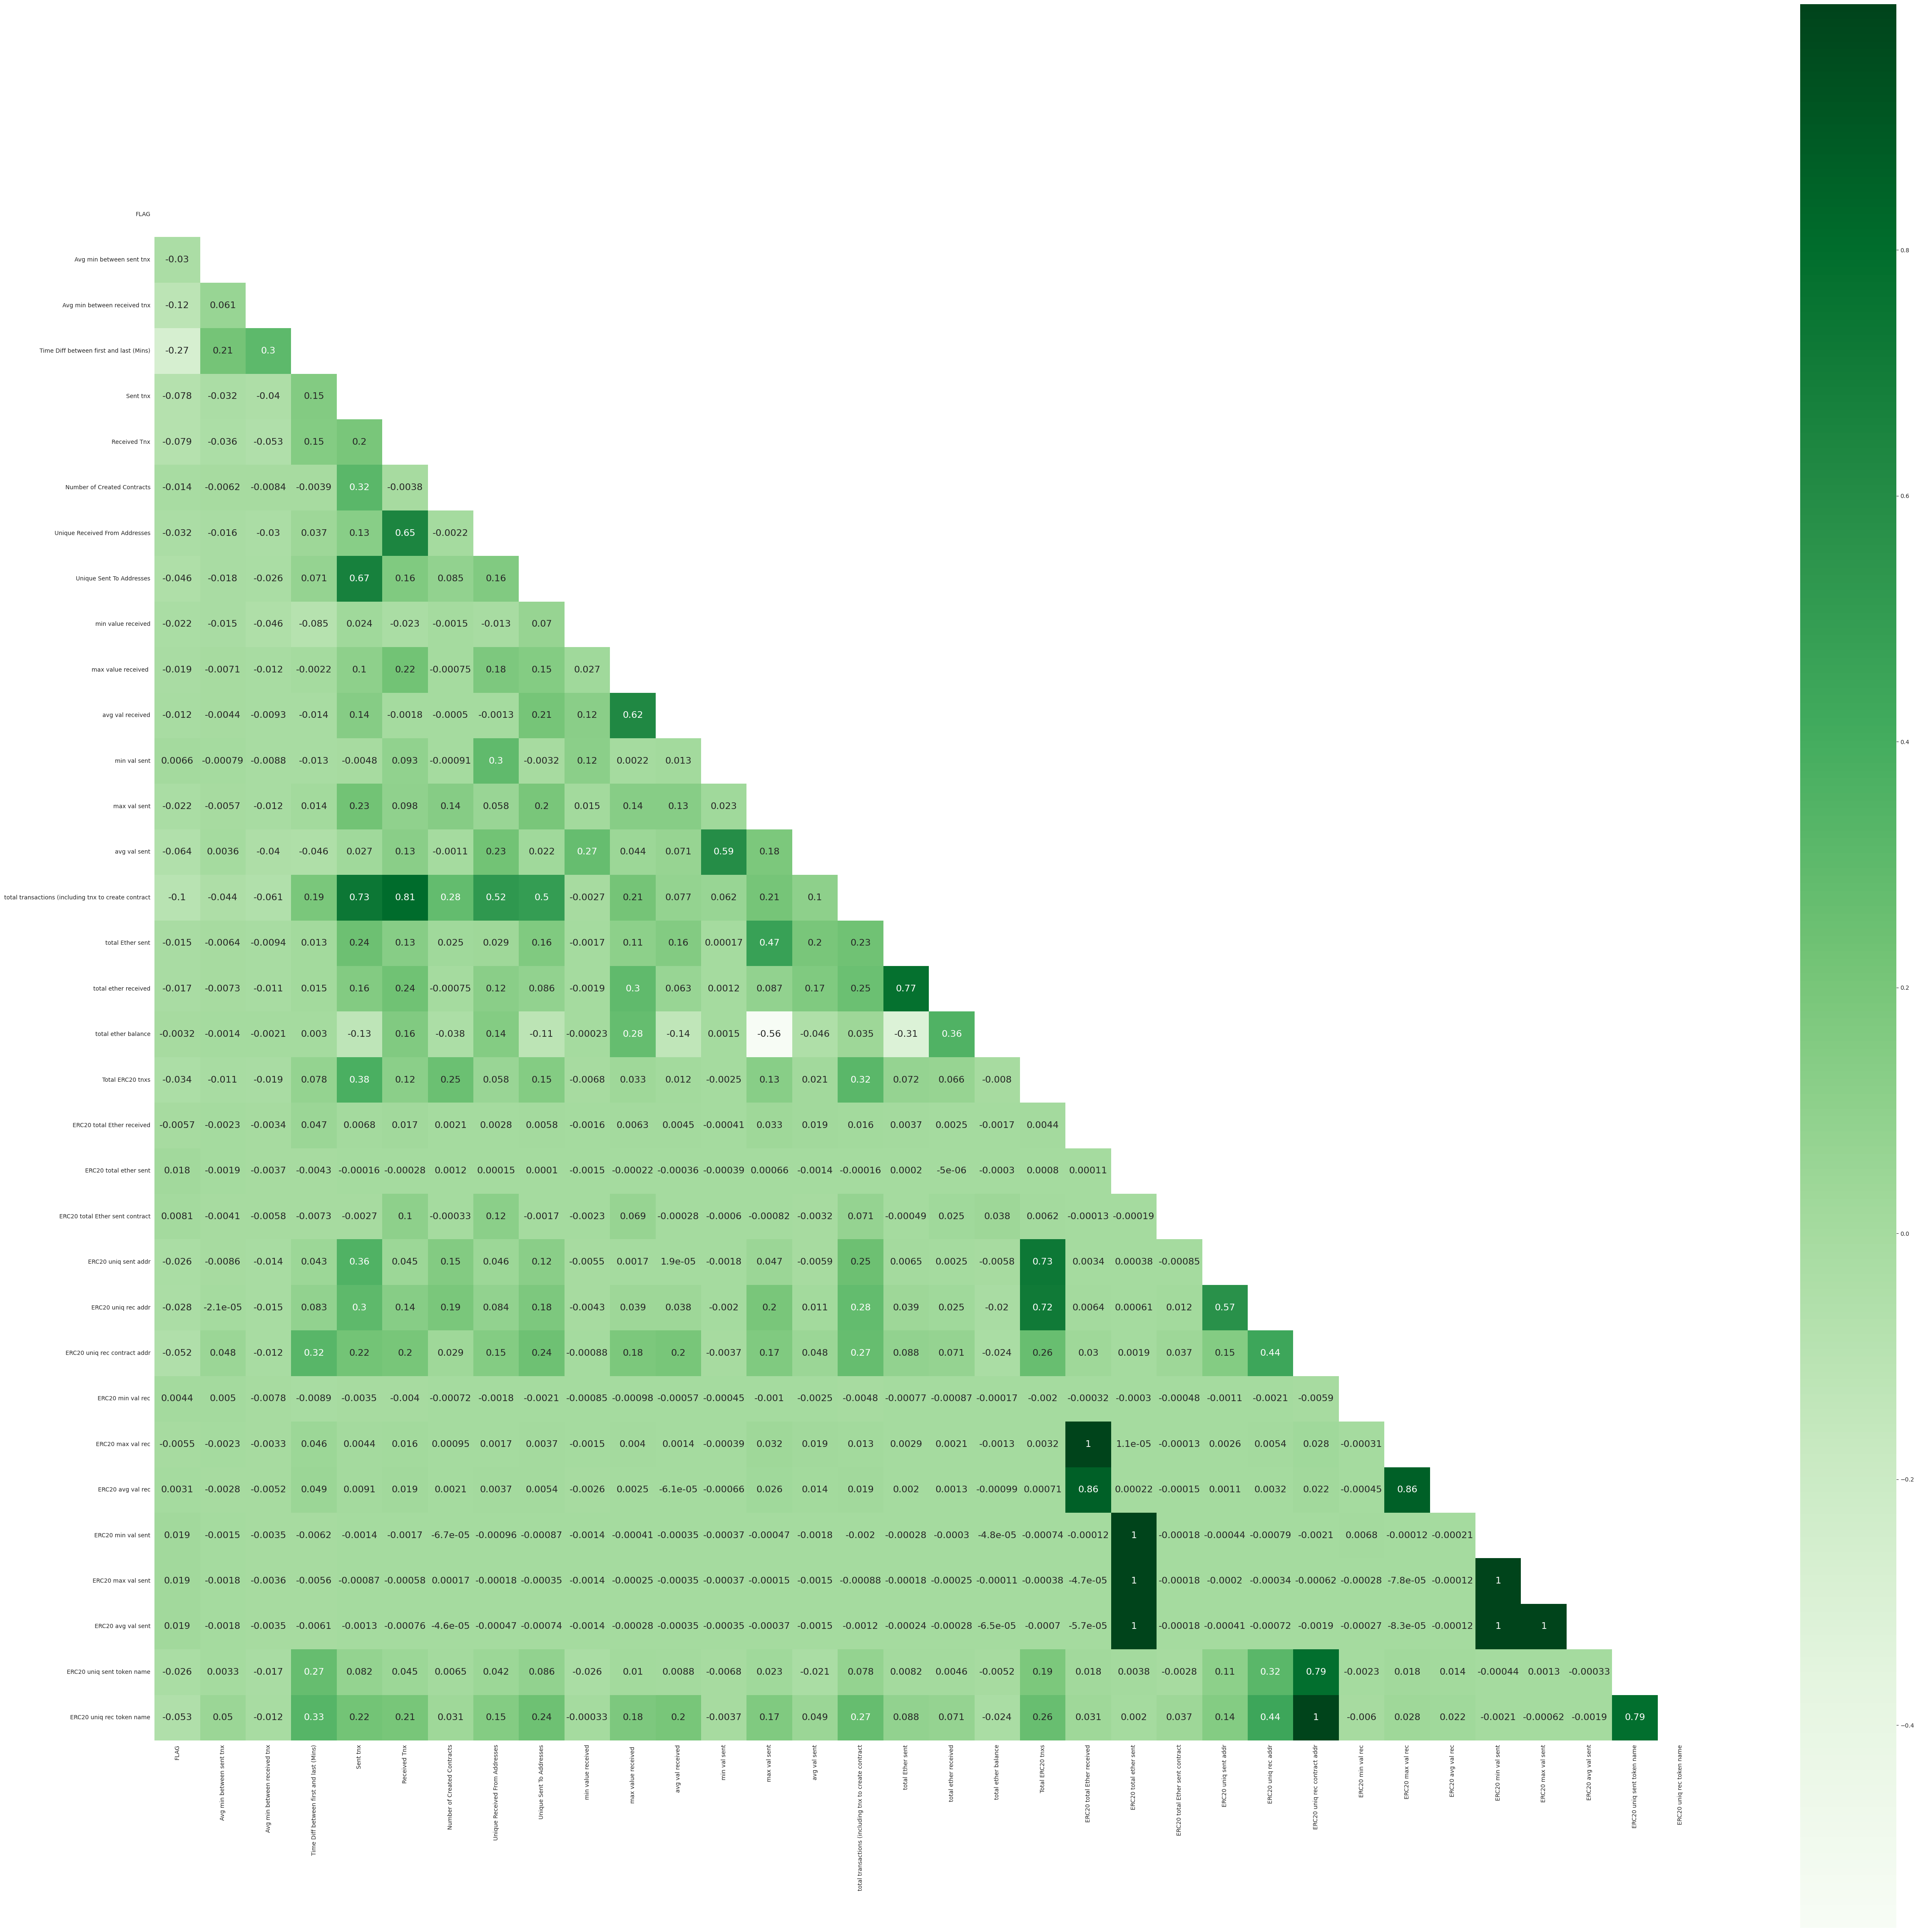

In [15]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60, 60))
    sns.heatmap(corr, mask=mask, cmap='Greens', annot=True, square=True, annot_kws={'size': 16})

In [16]:
sorted_corr = corr.sort_values(by=['FLAG'], key=abs)
sorted_corr

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
ERC20 avg val rec,0.003132,-0.002829,-0.005241,0.049160,0.009104,0.019382,0.002096,0.003741,0.005412,-0.002610,...,0.003159,0.021501,-0.000455,0.859766,1.000000,-0.000205,-0.000117,-0.000123,0.013764,0.022273
total ether balance,-0.003229,-0.001425,-0.002149,0.002955,-0.127211,0.158146,-0.037902,0.144949,-0.113428,-0.000233,...,-0.019831,-0.023787,-0.000170,-0.001251,-0.000991,-0.000048,-0.000112,-0.000065,-0.005164,-0.023809
ERC20 min val rec,0.004434,0.004998,-0.007794,-0.008921,-0.003480,-0.004043,-0.000724,-0.001784,-0.002093,-0.000847,...,-0.002115,-0.005930,1.000000,-0.000311,-0.000455,0.006815,-0.000280,-0.000265,-0.002288,-0.006013
ERC20 max val rec,-0.005510,-0.002260,-0.003326,0.046278,0.004445,0.015522,0.000946,0.001691,0.003696,-0.001528,...,0.005393,0.027598,-0.000311,1.000000,0.859766,-0.000121,-0.000078,-0.000083,0.017746,0.028497
ERC20 total Ether received,-0.005711,-0.002339,-0.003430,0.046570,0.006840,0.016648,0.002099,0.002832,0.005809,-0.001580,...,0.006393,0.030039,-0.000322,0.999967,0.859823,-0.000125,-0.000047,-0.000057,0.018349,0.030934
min val sent,0.006626,-0.000789,-0.008761,-0.013107,-0.004846,0.093448,-0.000913,0.296240,-0.003166,0.117682,...,-0.001966,-0.003749,-0.000446,-0.000393,-0.000663,-0.000369,-0.000366,-0.000353,-0.006785,-0.003728
ERC20 total Ether sent contract,0.008127,-0.004101,-0.005813,-0.007337,-0.002652,0.104939,-0.000334,0.116755,-0.001697,-0.002331,...,0.012224,0.037021,-0.000477,-0.000125,-0.000154,-0.000184,-0.000183,-0.000177,-0.002817,0.036892
avg val received,-0.011881,-0.004382,-0.009313,-0.014002,0.140677,-0.001786,-0.000498,-0.001324,0.207410,0.122911,...,0.037552,0.202754,-0.000566,0.001390,-0.000061,-0.000354,-0.000349,-0.000346,0.008779,0.200341
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,...,0.190766,0.029421,-0.000724,0.000946,0.002096,-0.000067,0.000173,-0.000046,0.006475,0.030527
total Ether sent,-0.014993,-0.006440,-0.009442,0.012999,0.244434,0.132150,0.024877,0.028881,0.164535,-0.001748,...,0.038839,0.088149,-0.000766,0.002944,0.001952,-0.000276,-0.000176,-0.000238,0.008216,0.088281


In [17]:
corr['FLAG']

FLAG                                                    1.000000
Avg min between sent tnx                               -0.029754
Avg min between received tnx                           -0.118533
Time Diff between first and last (Mins)                -0.269354
Sent tnx                                               -0.078006
Received Tnx                                           -0.079316
Number of Created Contracts                            -0.013711
Unique Received From Addresses                         -0.031941
Unique Sent To Addresses                               -0.045584
min value received                                     -0.021641
max value received                                     -0.019259
avg val received                                       -0.011881
min val sent                                            0.006626
max val sent                                           -0.022437
avg val sent                                           -0.063556
total transactions (inclu

In [18]:
drop = ['total transactions (including tnx to create contract',
        ' ERC20 avg val rec',
        ' ERC20 avg val rec',
        ' ERC20 max val rec', 
        ' ERC20 min val rec', 
        ' ERC20 uniq rec contract addr', 
        'max val sent', 
        ' ERC20 avg val sent',
        ' ERC20 min val sent', 
        ' ERC20 max val sent', 
        ' Total ERC20 tnxs', 
        'Unique Sent To Addresses',
        'Unique Received From Addresses', 
        'total ether received', 
        ' ERC20 uniq sent token name', 
        'min value received', 
        'min val sent', 
        ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

In [19]:
df.shape

(9841, 17)

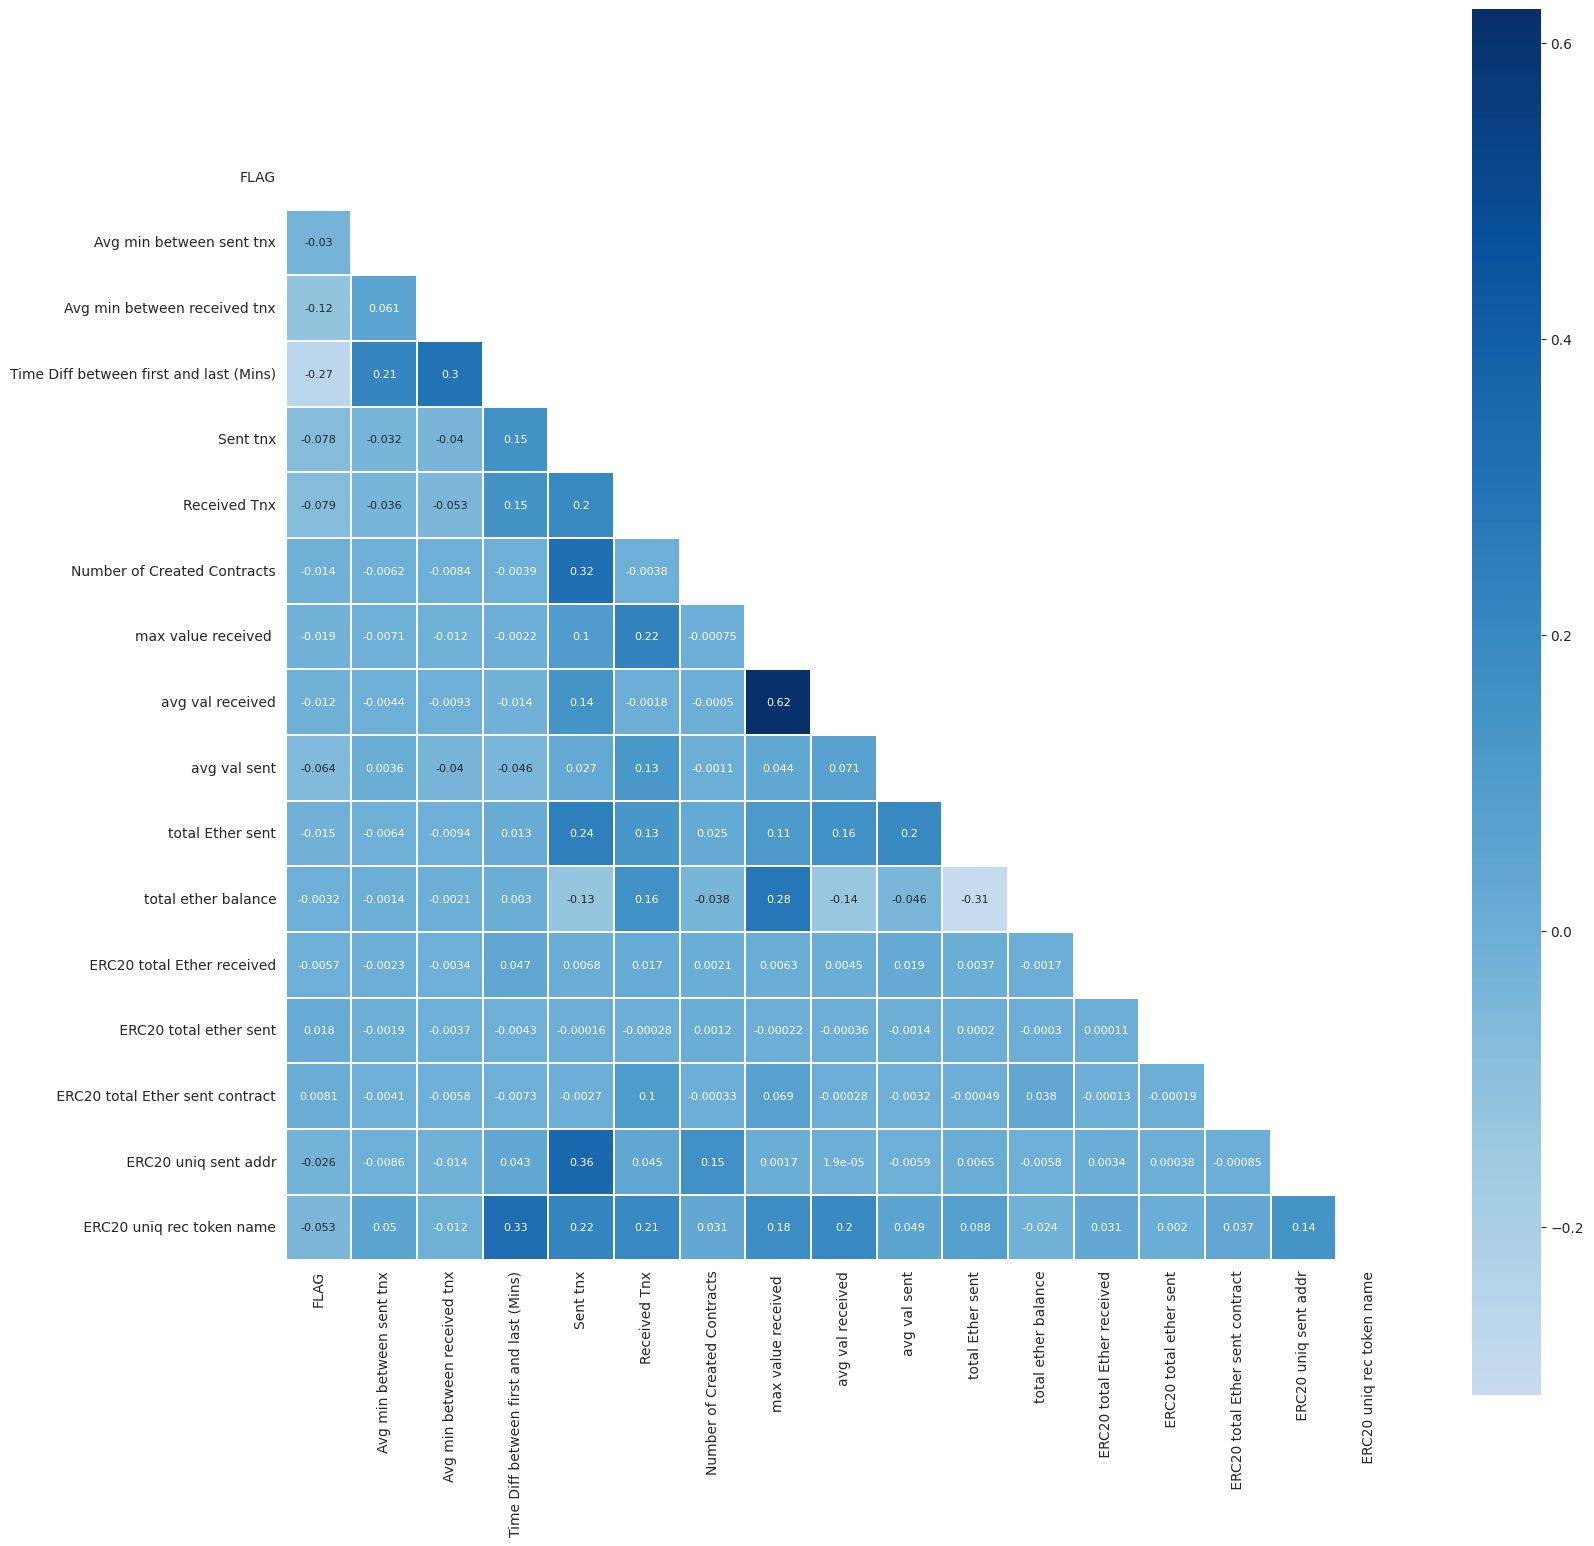

In [20]:
# Recheck Correlation Heatmap
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18, 18))
    sns.heatmap(corr, mask=mask, cmap='Blues', square=True, annot=True, annot_kws={'size': 8}, center=0, linewidths=0.1)

### <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Let's Make the data ready for training</p>

In [21]:
X = df.iloc[:, 1:]
y = df['FLAG']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [23]:
scaler = StandardScaler()
sc_train = scaler.fit_transform(X_train)

In [24]:
over_sampler = imb.over_sampling.SMOTE()
X_tr_resample, y_tr_resample = over_sampler.fit_resample(sc_train, y_train)


In [25]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6139 
 	Fauds: 1733
AFTER OVERSAMPLING 
 	Non-frauds: 6139 
 	Fauds: 6140


In [26]:
def lg_reg(X_train, X_test, y_train, y_test, ):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.YELLOW + "            Logistic Regression Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix: {sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="BuPu")}')
    plt.show()

            Logistic Regression Classifier       


Accuracy  : 0.6287455561198578
Precision : 0.36231884057971014
Recall    : 0.8408071748878924
f1 score  : 0.5064145847400405


              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1523
           1       0.36      0.84      0.51       446

    accuracy                           0.63      1969
   macro avg       0.64      0.70      0.60      1969
weighted avg       0.80      0.63      0.66      1969

Confusion Matrix: Axes(0.125,0.11;0.62x0.77)


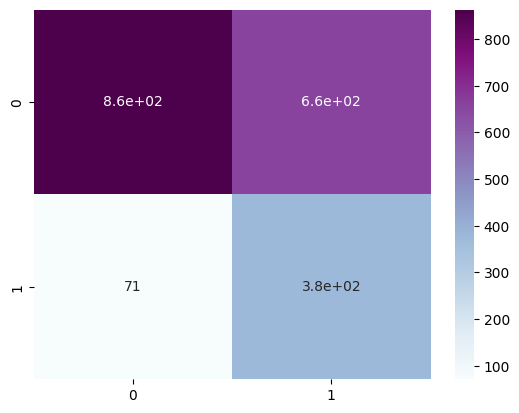

In [27]:
X_test = scaler.transform(X_test)
lg_reg(X_tr_resample,X_test, y_tr_resample, y_test)

In [28]:
def ada_b(X_train, X_test, y_train, y_test):
    model = AdaBoostClassifier()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.MAGENTA +"            AdaBoost Classifier     \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Purples")}')
    plt.show()

            AdaBoost Classifier     


Accuracy  : 0.9476891823260538
Precision : 0.859538784067086
Recall    : 0.9192825112107623
f1 score  : 0.8884073672806068


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1523
           1       0.86      0.92      0.89       446

    accuracy                           0.95      1969
   macro avg       0.92      0.94      0.93      1969
weighted avg       0.95      0.95      0.95      1969

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


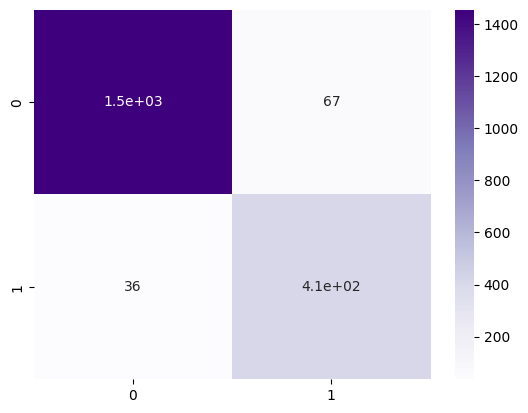

In [29]:
ada_b(X_tr_resample, X_test, y_tr_resample, y_test)

            Support Vector Classifier     


Accuracy  : 0.7973590655154901
Precision : 0.5344070278184481
Recall    : 0.8183856502242153
f1 score  : 0.6465899025686448


              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1523
           1       0.53      0.82      0.65       446

    accuracy                           0.80      1969
   macro avg       0.74      0.80      0.75      1969
weighted avg       0.85      0.80      0.81      1969

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


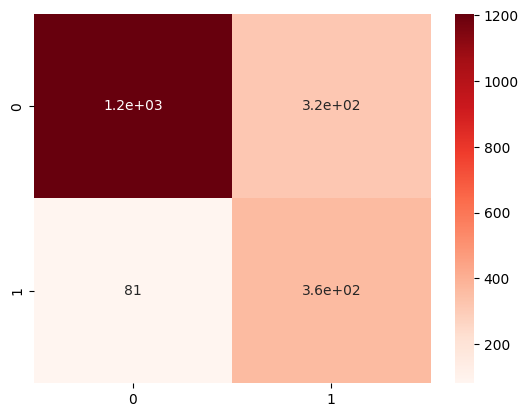

In [30]:
def svm_c(X_train, X_test, y_train, y_test):
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.LIGHTRED_EX +"            Support Vector Classifier     \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Reds")}')
    plt.show()
    
svm_c(X_tr_resample, X_test, y_tr_resample, y_test)

             Random Forest Classifier       


Accuracy  : 0.9431183341797867
Precision : 0.8380566801619433
Recall    : 0.9282511210762332
f1 score  : 0.8808510638297873


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1523
           1       0.84      0.93      0.88       446

    accuracy                           0.94      1969
   macro avg       0.91      0.94      0.92      1969
weighted avg       0.95      0.94      0.94      1969

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


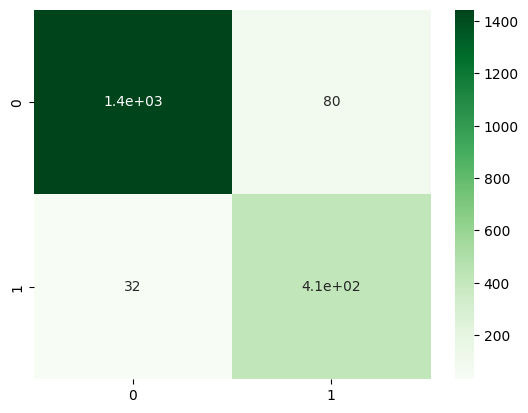

In [31]:
def RF(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=300, max_depth=5)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.GREEN +"             Random Forest Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Greens" )}')
    plt.show()
RF(X_tr_resample, X_test, y_tr_resample, y_test)

             Catboost Classifier       


Accuracy  : 0.9756221432199086
Precision : 0.9461883408071748
Recall    : 0.9461883408071748
f1 score  : 0.9461883408071748


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1523
           1       0.95      0.95      0.95       446

    accuracy                           0.98      1969
   macro avg       0.97      0.97      0.97      1969
weighted avg       0.98      0.98      0.98      1969

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


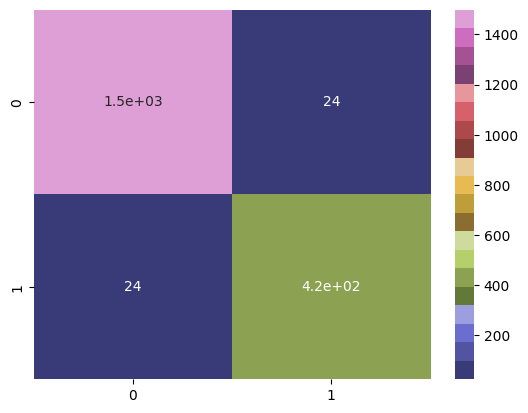

In [32]:
# Model 4: Catboost
def cat_b(X_train, X_test, y_train, y_test):
    model = ctb.CatBoostClassifier(learning_rate=0.015, verbose=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.CYAN +"             Catboost Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="tab20b" )}')
    plt.show()
cat_b(X_tr_resample, X_test, y_tr_resample, y_test)

         Extrem Gradient Boosting Classifier       


Accuracy  : 0.9761300152361605
Precision : 0.9565217391304348
Recall    : 0.9372197309417041
f1 score  : 0.9467723669309174


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1523
           1       0.96      0.94      0.95       446

    accuracy                           0.98      1969
   macro avg       0.97      0.96      0.97      1969
weighted avg       0.98      0.98      0.98      1969

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


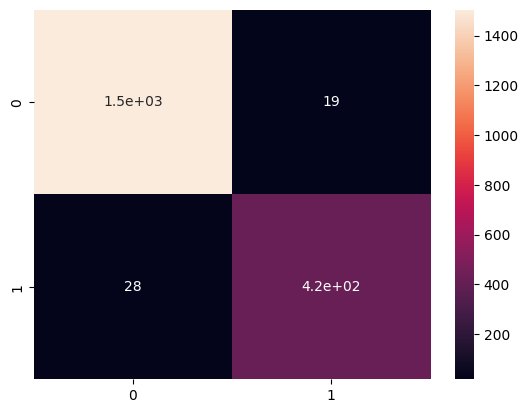

In [33]:
# Model 5: XGBoost
def xgb_c(X_train, X_test, y_train, y_test):
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.BLUE +"         Extrem Gradient Boosting Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="rocket" )}')
    plt.show()
    
xgb_c(X_tr_resample, X_test, y_tr_resample, y_test)

In [34]:
model = xgb.XGBClassifier()
model.fit(X_tr_resample, y_tr_resample,)
y_pred = model.predict(X_test)
round(f1_score(y_test, y_pred), 2)

0.95

#### HyperParametr Tuning for XGBoost model

In [35]:
# params = {'learning_rate': [0.01, 0.02, 0.05],
#          'max_depth': [5, 6, 7],
#          'n_estimators': [200, 300, 400, 500],
#          'gamma': [0.1, 0.2]}
# grid = GridSearchCV(estimator=model, param_grid=params, scoring='f1', verbose=0)

# grid.fit(X_tr_resample, y_tr_resample)

# print(f'Best Parameters: {grid.best_params_}')
# print(f'Best Estimator : {grid.best_estimator_}')
# print(f'Best f1 Score  : {round(grid.best_score_, 3)}')

In [36]:
def classification_evaluation(y_true, y_pred):
    print(f'        Model Evaluation       ')
    print(f'ACCURACY : {accuracy_score(y_true, y_pred):.2f}')
    print(f'RECALL   : {recall_score(y_true, y_pred):.2f}')
    print(f'PRECISION: {precision_score(y_true, y_pred):.2f}')
    print(f'F1 SCORE : {f1_score(y_true, y_pred):.2f}')
    

In [37]:
best_model_xgb = xgb.XGBClassifier(
    gamma=0.2, learning_rate=0.05,max_delta_step=0, max_depth=6,n_estimators=400,
              )


best_model_xgb.fit(X_tr_resample, y_tr_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=6, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [38]:
y_pred_train = best_model_xgb.predict(X_tr_resample)
print('Train Set: ')
classification_evaluation(y_tr_resample, y_pred_train)

Train Set: 
        Model Evaluation       
ACCURACY : 1.00
RECALL   : 1.00
PRECISION: 1.00
F1 SCORE : 1.00


In [39]:
y_pred_test = best_model_xgb.predict(X_test)
print('Test Set: ')
classification_evaluation(y_test, y_pred_test)

Test Set: 
        Model Evaluation       
ACCURACY : 0.98
RECALL   : 0.94
PRECISION: 0.95
F1 SCORE : 0.95


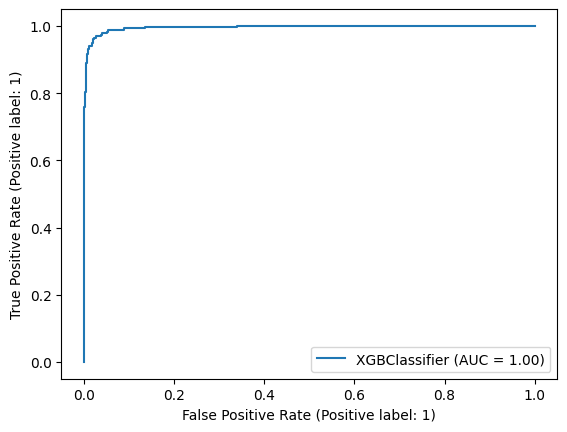

In [40]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, 
               X_test, y_test)
plt.show()

#### Ploting Feature Importance of model

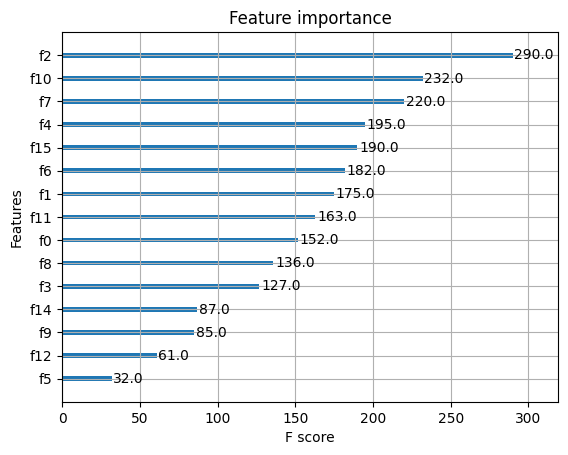

In [41]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

#### Lets make a pipeline and save it

In [42]:
pipe_line = Pipeline([
    ('scaler', StandardScaler()),
    ('estiamtor', model)])

joblib.dump(pipe_line, 'pipe_line_fraud_detection')

['pipe_line_fraud_detection']